columns:

location -> Sydney

Date -> 2008 - 2017

MinTemp -> Minimum temperature recorded for the day (°C)

MaxTemp -> Maximum temperature recorded for the day (°C)

Rainfall -> Total rainfall in millimeters (mm) for the day

Evaporation -> measurement (mm) for the day

sunshine -> Hours of bright sunshine during the day.

Humidity9am: Relative humidity (%) at 9:00 AM

Humidity3pm: Relative humidity (%) at 3:00 PM

Pressure9am & Pressure3pm -> Atmospheric pressure at 9:00 AM and 3:00 PM.

Cloud9am & Cloud3pm -> Cloud cover at 9:00 AM and 3:00 PM.

Temp9am & Temp3pm -> Temperature (°C) at 9:00 AM and 3:00 PM

RainTomorrow -> output to predict

In [ ]:
import pandas as pd

# Load the dataset
file_path = r'C:\Users\parva\Downloads\sydney_rain prediction.xlsx'
rain_data = pd.read_excel(file_path)

# Display the first few rows of the dataset to understand its structure
rain_data.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


Checking for missing values

In [2]:
# Checking for missing values in the dataset
missing_values = rain_data.isnull().sum()

# Percentage of missing values
missing_percentage = (missing_values / len(rain_data)) * 100

missing_data_summary = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data_summary.sort_values(by='Percentage', ascending=False)


,Missing Values,Percentage
Cloud9am,566,16.961343
Cloud3pm,561,16.811507
Evaporation,51,1.528319
Pressure9am,20,0.599341
Pressure3pm,19,0.569374
Sunshine,16,0.479473
Humidity9am,14,0.419539
Humidity3pm,13,0.389571
Rainfall,6,0.179802
RainToday,6,0.179802


The columns with the highest percentage of missing values are Cloud9am and Cloud3pm. 
Other columns Evaporation, Pressure9am, Pressure3pm, and Sunshine also have missing values but to a lesser extent.

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np
# use the median to impute missing values
numerical_columns = rain_data.select_dtypes(include=[np.number]).columns 
imputer_num = SimpleImputer(strategy='median') #SimpleImputer() used to fill in missing values (i.e., NaN or blank values)
rain_data[numerical_columns] = imputer_num.fit_transform(rain_data[numerical_columns])

# use the mode to impute missing values
categorical_columns = rain_data.select_dtypes(include=['object']).columns
imputer_cat = SimpleImputer(strategy='most_frequent')
rain_data[categorical_columns] = imputer_cat.fit_transform(rain_data[categorical_columns])

# Converting categorical variables to numerical format
rain_data['RainToday'] = rain_data['RainToday'].map({'Yes': 1, 'No': 0})
rain_data['RainTomorrow'] = rain_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# Check for missing values 
remaining_missing_values = rain_data.isnull().sum().sum()

remaining_missing_values, rain_data.head()


(0,
         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
 0 2008-02-01   Sydney     19.5     22.4      15.6          6.2       0.0   
 1 2008-02-02   Sydney     19.5     25.6       6.0          3.4       2.7   
 2 2008-02-03   Sydney     21.6     24.5       6.6          2.4       0.1   
 3 2008-02-04   Sydney     20.2     22.8      18.8          2.2       0.0   
 4 2008-02-05   Sydney     19.7     25.7      77.4          4.8       0.0   
 
    Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
 0         92.0         84.0       1017.6       1017.4       8.0       8.0   
 1         83.0         73.0       1017.9       1016.4       7.0       7.0   
 2         88.0         86.0       1016.7       1015.6       7.0       8.0   
 3         83.0         90.0       1014.2       1011.8       8.0       8.0   
 4         88.0         74.0       1008.3       1004.8       8.0       8.0   
 
    Temp9am  Temp3pm  RainToday  RainTomorrow  
 0     20.7   

In [ ]:
# Extracting year, month, and day from the Date column
# .dt is a pandas accessor used specifically for datetime
rain_data['Year'] = rain_data['Date'].dt.year
rain_data['Month'] = rain_data['Date'].dt.month
rain_data['Day'] = rain_data['Date'].dt.day

# Dropping the original Date column as it's no longer needed
rain_data = rain_data.drop('Date', axis=1)

# Excluding 'RainToday' and 'RainTomorrow' as they will not provide any differences in the output
numerical_features = rain_data.select_dtypes(include=[np.number]).columns.drop(['RainToday', 'RainTomorrow'])

rain_data[numerical_features].describe()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000
mean,14.865088,23.002218,3.324243,5.181510,7.184747,68.232245,54.704225,1018.347678,1016.020375,4.320348,4.181900,17.820198,21.533054,2012.300869,6.413545,15.705424
std,4.551593,4.493293,9.887277,2.756505,3.802525,15.053751,16.261954,7.000519,7.012189,2.524256,2.410918,4.894258,4.301163,2.761933,3.397846,8.795802
min,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000,2008.000000,1.000000,1.000000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.800000,1011.300000,2.000000,2.000000,13.800000,18.400000,2010.000000,3.000000,8.000000
50%,14.900000,22.800000,0.000000,4.800000,8.300000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000,2012.000000,6.000000,16.000000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000,2015.000000,9.000000,23.000000
max,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000,2017.000000,12.000000,31.000000


performing Correlation Analysis

In [ ]:
from sklearn.preprocessing import StandardScaler

# StandardScaler is used to standardize your numerical data,so mean=0,standard deviation= 1
scaler = StandardScaler() 
rain_data[numerical_features] = scaler.fit_transform(rain_data[numerical_features])

# Checking the transformed data
rain_data.describe()


: 

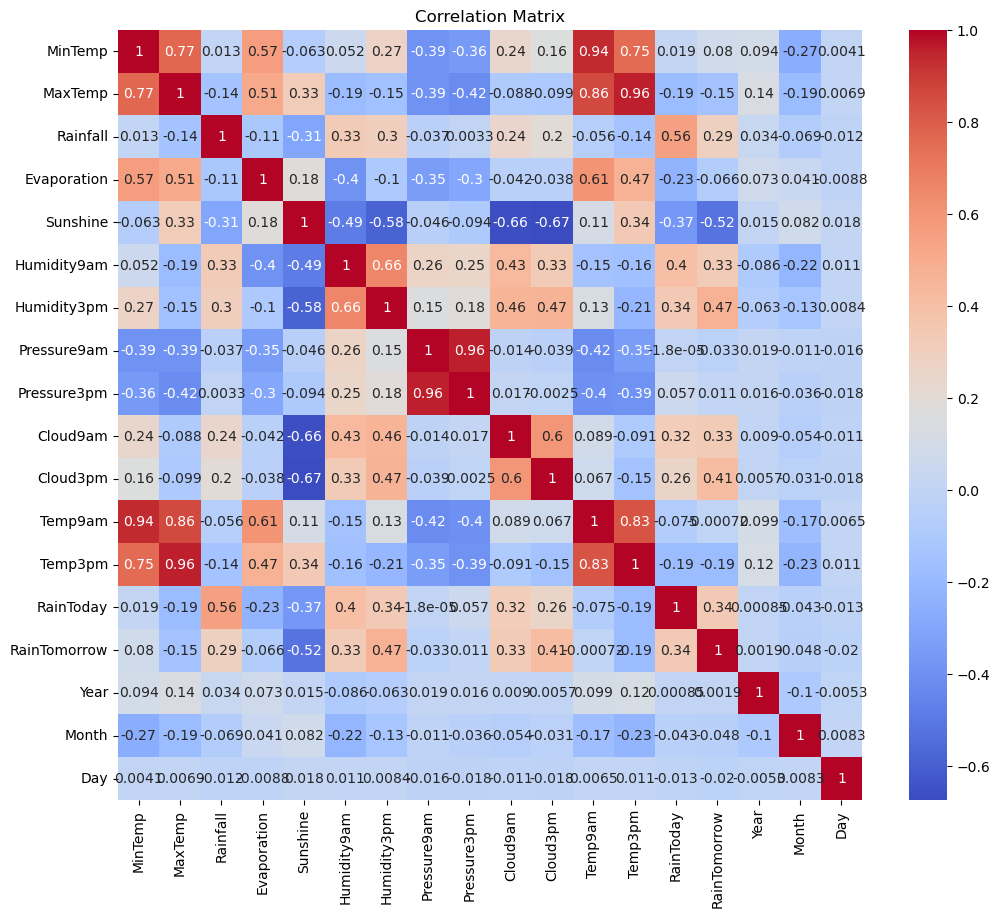

Humidity3pm    0.471224
Cloud3pm       0.411826
RainToday      0.340894
Cloud9am       0.331352
Humidity9am    0.328952
Rainfall       0.293675
MinTemp        0.079958
Pressure3pm    0.010951
Year           0.001919
Temp9am       -0.000723
Day           -0.020466
Pressure9am   -0.032519
Month         -0.048052
Evaporation   -0.065904
MaxTemp       -0.149253
Temp3pm       -0.188912
Sunshine      -0.521357
Name: RainTomorrow, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dropping non-numeric columns
rain_data_numeric = rain_data.drop(['Location'], axis=1)

# Correlation analysis on the numeric data
correlation_matrix = rain_data_numeric.corr()

# Plotting the correlation matrix with respect to 'RainTomorrow'
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Displaying the correlation values of features with 'RainTomorrow'
correlation_with_target = correlation_matrix['RainTomorrow'].sort_values(ascending=False)
print(correlation_with_target.drop('RainTomorrow'))  # Excluding the target variable itself

Key observations of Corelation Analysis:

1. High Positive Correlation: Features like Humidity3pm, Cloud3pm, RainToday, Cloud9am, and Humidity9am show a strong positive correlation. This implies that higher values of these features are associated with a higher likelihood of rain the next day.

2. High Negative Correlation: Sunshine shows a strong negative correlation, indicating that more sunshine is associated with a lower likelihood of rain the next day.

3. Low or Insignificant Correlation: Features like Pressure9am, Year, Temp9am, Day, Month, Evaporation, MaxTemp, and Temp3pm have low or negative correlations. This suggests they might be less critical in predicting rain.

Model Building:

We'll focus on the following models as per the task requirements:

Decision Tree Classifier
Random Forest Classifier (an ensemble method using bagging)
Boosting Techniques: We can consider algorithms like Gradient Boosting or AdaBoost.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Assuming 'Location' is the non-numeric column, we drop it
X = rain_data.drop(['RainTomorrow', 'Location'], axis=1)  

y = rain_data['RainTomorrow']  # Target variable 

# splitting the dataset into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
gradient_boosting = GradientBoostingClassifier(random_state=42)

# Dictionary to hold the models and their names
models = {
    "Decision Tree": decision_tree,
    "Random Forest": random_forest,
    "Gradient Boosting": gradient_boosting
}

# Function to train and evaluate models
def train_and_evaluate(models, X_train, y_train, X_test, y_test):
    model_results = {}

    for name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate accuracy and confusion matrix
        accuracy = accuracy_score(y_test, y_pred)
        confusion = confusion_matrix(y_test, y_pred)

        model_results[name] = {"Accuracy": accuracy, "Confusion Matrix": confusion}

    return model_results

# Train and evaluate the models
model_performance = train_and_evaluate(models, X_train, y_train, X_test, y_test)
model_performance

{'Decision Tree': {'Accuracy': 0.7589820359281437,
  'Confusion Matrix': array([[407,  77],
         [ 84, 100]], dtype=int64)},
 'Random Forest': {'Accuracy': 0.8263473053892215,
  'Confusion Matrix': array([[454,  30],
         [ 86,  98]], dtype=int64)},
 'Gradient Boosting': {'Accuracy': 0.8233532934131736,
  'Confusion Matrix': array([[449,  35],
         [ 83, 101]], dtype=int64)}}

Decision Tree Classifier

Accuracy: 75.90%
Confusion Matrix:
True Negatives (TN): 407
False Positives (FP): 77
False Negatives (FN): 84
True Positives (TP): 100
The Decision Tree model correctly predicted rain on 75.90% of the days. However, it misclassified 77 no-rain days as rain (FP) and 84 rain days as no-rain (FN).

Random Forest Classifier

Accuracy: 82.63%
Confusion Matrix:
TN: 454
FP: 30
FN: 86
TP: 98
The Random Forest model showed better performance with an accuracy of 82.63%. It had fewer false positives but still misclassified 86 rain days as no-rain.

Gradient Boosting Classifier

Accuracy: 82.34%
Confusion Matrix:
TN: 449
FP: 35
FN: 83
TP: 101
The Gradient Boosting model's accuracy is close to that of the Random Forest model, at 82.34%. It has a slightly higher number of true positives and false positives compared to the Random Forest model.

Best Overall Performance: The Random Forest Classifier, with the highest accuracy and lowest false positives, might be considered the best model overall.
Rain Prediction Priority: If the priority is to capture as many rainy days as possible (even at the risk of more false alarms), the Gradient Boosting Classifier could be the best choice.

1. My Views About the Problem Statement
The problem statement involves creating a machine learning model to predict rainfall in Sydney, which is a practical and highly relevant task in meteorology. It's particularly interesting as it combines historical weather data with machine learning techniques to provide potentially more accurate weather forecasts. The use of ensemble methods is a wise choice given their proven effectiveness in handling such prediction tasks.

2. Approach to Solving the Task
Data Preprocessing: This included handling missing values, converting categorical variables to numerical formats, and standardizing the features.
    
Feature Engineering: Extracted year, month, and day from the Date column and performed correlation analysis to identify significant predictors.
    
Model Selection and Training: Chose to implement a Decision Tree, Random Forest, and Gradient Boosting Classifier based on their suitability for the task.
    
Model Evaluation: Used accuracy and confusion matrix to assess each model's performance.

3. Available ML Model Options
Decision Tree Classifier: A basic, interpretable model, effective for baseline performance.
    
Random Forest Classifier: An ensemble method using bagging, it builds multiple decision trees and merges them together for a more accurate and stable prediction.
    
Gradient Boosting Classifier: An ensemble boosting technique that builds sequential models, each correcting the errors of the previous ones.

4. Best Performing Model and Possible Reasons
The Random Forest Classifier performed the best in terms of accuracy. This superiority can be attributed to:

    a. Its ability to reduce overfitting by averaging multiple decision trees.
    b. Handling both linear and non-linear relationships well.
    c. Its robustness to outliers and noisy data.
    
5. Steps to Further Improve the Model's Performance

  a.Hyperparameter Tuning: Experiment with various parameters of the Random Forest model to find the most optimal combination.
  b. Advanced Feature Engineering: Investigate if additional features can be derived or if feature selection can be optimized.
  c. Cross-Validation: Use techniques like k-fold cross-validation for a more reliable assessment of the model's performance.